In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pyrsm as rsm
import statsmodels.api as sm
import statsmodels.formula.api as smf

county_data = pd.read_csv("/home/jovyan/Documents/Rady/MGTA 452/Project_dataset.csv")
county_df = pd.DataFrame(county_data)


In [191]:
od_mean_20 = county_df['drug_od_count_2020'].sum() / len(county_df['County'])
od_mean_21 = county_df['drug_od_count_2021'].sum() / len(county_df['County'])
od_mean_22 = county_df['drug_od_count_2022'].sum() / len(county_df['County'])
od_mean_23 = county_df['drug_od_count_2023'].sum() / len(county_df['County'])


od_median_20 = county_df['drug_od_count_2020'].median()
od_median_21 = county_df['drug_od_count_2021'].median()
od_median_22 = county_df['drug_od_count_2022'].median()
od_median_23 = county_df['drug_od_count_2023'].median()

od_max_20 = county_df['drug_od_count_2020'].max()
od_max_21 = county_df['drug_od_count_2021'].max()
od_max_22 = county_df['drug_od_count_2022'].max()
od_max_23 = county_df['drug_od_count_2023'].max()


print(f"2020 Avg Drug ODs: {od_mean_20:.0f}")
print(f"2021 Avg Drug ODs: {od_mean_21:.0f}")
print(f"2022 Avg Drug ODs: {od_mean_22:.0f}")
print(f"2023 Avg Drug ODs: {od_mean_23:.0f}")

print(f"2020 Median Drug ODs: {od_median_20:.0f}")
print(f"2021 Median Drug ODs: {od_median_21:.0f}")
print(f"2022 Median Drug ODs: {od_median_22:.0f}")
print(f"2023 Median Drug ODs: {od_median_23:.0f}")

print(f"2020 Max Drug ODs: {od_max_20:.0f}")
print(f"2021 Max Drug ODs: {od_max_21:.0f}")
print(f"2022 Max Drug ODs: {od_max_22:.0f}")
print(f"2023 Max Drug ODs: {od_max_23:.0f}")


2020 Avg Drug ODs: 27
2021 Avg Drug ODs: 32
2022 Avg Drug ODs: 32
2023 Avg Drug ODs: 31
2020 Median Drug ODs: 6
2021 Median Drug ODs: 7
2022 Median Drug ODs: 7
2023 Median Drug ODs: 7
2020 Max Drug ODs: 1937
2021 Max Drug ODs: 2238
2022 Max Drug ODs: 2345
2023 Max Drug ODs: 2238


Text(0.5, 1.0, 'Distribution of opioid dispensing rates by county (2023)')

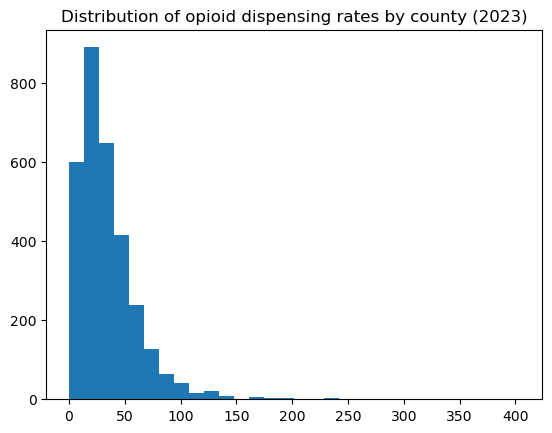

In [192]:
plt.hist(county_df['opioid_dispensing_rate_2023'], bins=30)
plt.title('Distribution of opioid dispensing rates by county (2023)')


Text(0.5, 1.0, 'OD Rate vs unemployment')

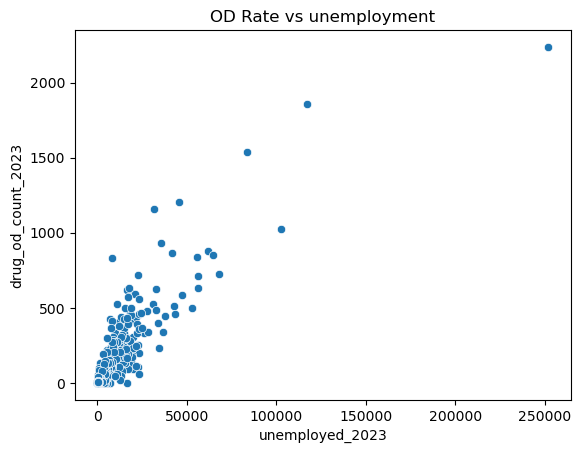

In [193]:
sns.scatterplot(
    x=county_df['unemployed_2023'],
    y=county_df['drug_od_count_2023']
)
plt.title("OD Rate vs unemployment")


Text(0.5, 1.0, 'Opioid Dispensing Rate vs Unemployment')

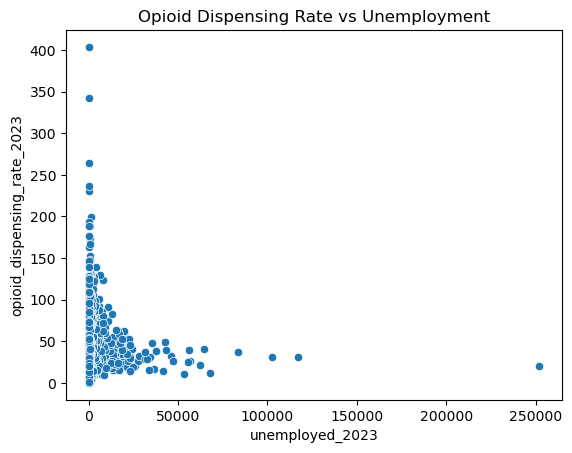

In [194]:
sns.scatterplot(
    x=county_df['unemployed_2023'],
    y=county_df['opioid_dispensing_rate_2023']
)
plt.title("Opioid Dispensing Rate vs Unemployment")


Text(0.5, 1.0, 'Distribution of OD rates by county (2023)')

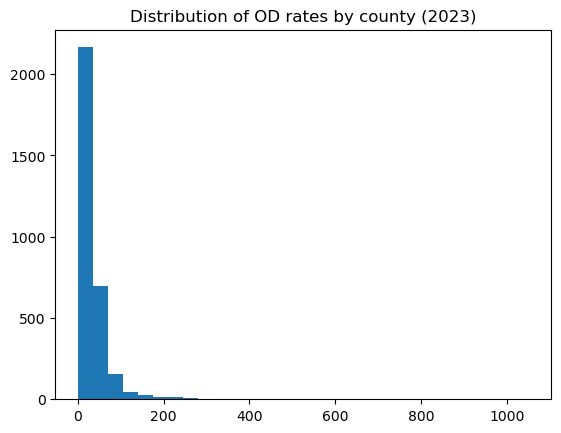

In [195]:
plt.hist(county_df['od_rate_2023_per100k'], bins=30)
plt.title('Distribution of OD rates by county (2023)')

Text(0.5, 1.0, 'SAMSHA Count to OD rate')

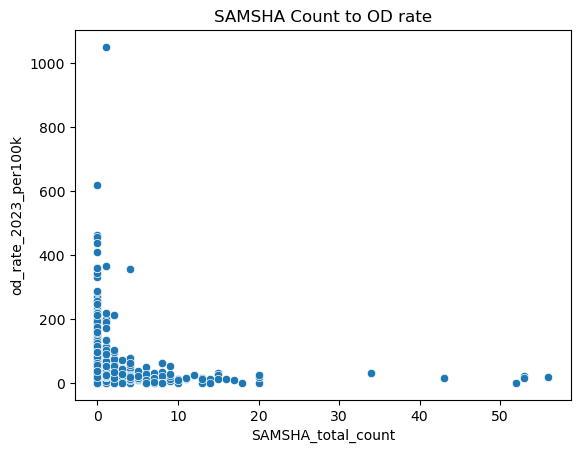

In [196]:
sns.scatterplot(
    x=county_df['SAMSHA_total_count'],
    y=county_df['od_rate_2023_per100k']
)
plt.title("SAMSHA Count to OD rate")


In [197]:
median_income = county_df['median_household_income_2023'].median()

county_df['od_rate_per_100k'] = (county_df['drug_od_count_2023'] / county_df['population_2023']) * 100000

county_df['below_median_income'] = (county_df['median_household_income_2023'] < median_income).astype(int)

below_median = county_df[county_df['below_median_income'] == 1]['od_rate_per_100k']
above_median = county_df[county_df['below_median_income'] == 0]['od_rate_per_100k']

t_stat, p_val = stats.ttest_ind(below_median, above_median, equal_var=False)

print(f"National Median Income: ${median_income:,.0f}")
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.5f}")
print(f"Mean OD rate (below median): {below_median.mean():.2f}")
print(f"Mean OD rate (above median): {above_median.mean():.2f}")

if p_val < 0.05:
    print("Reject H0: OD rates are significantly different between income groups.")
    if below_median.mean() > above_median.mean():
        print("Counties below median income have significantly higher OD rates.")
    else:
        print("Counties below median income have significantly lower OD rates.")
else:
    print("Fail to reject H0: No significant difference in OD rates between income groups.")

National Median Income: $62,784
T-statistic: 6.993
P-value: 0.00000
Mean OD rate (below median): 37.83
Mean OD rate (above median): 26.49
Reject H0: OD rates are significantly different between income groups.
Counties below median income have significantly higher OD rates.


In [210]:
low_income_df = county_df[county_df['median_household_income_2023'] < 68000]

low_inc_with_clinic = low_income_df[low_income_df['SAMSHA_pop_proportion'] > 0]['od_rate_2023_per100k']
low_inc_no_clinic   = low_income_df[low_income_df['SAMSHA_pop_proportion'] == 0]['od_rate_2023_per100k']

t2, p2 = stats.ttest_ind(low_inc_with_clinic, low_inc_no_clinic, equal_var=False)

print(f"T-statistic: {t2:.3f}")
print(f"P-value: {p2:.5f}")
print(f"Mean OD (clinic):    {low_inc_with_clinic.mean():.2f}")
print(f"Mean OD (no clinic): {low_inc_no_clinic.mean():.2f}")

if p2 < 0.05:
    effect = "LOWER" if low_inc_with_clinic.mean() < low_inc_no_clinic.mean() else "HIGHER"
    print(f"RESULT: Low-income counties WITH clinics have significantly {effect} OD rates.")
else:
    print("RESULT: Clinic access is NOT significantly associated with OD rates among low-income counties.")

T-statistic: -1.901
P-value: 0.05958
Mean OD (clinic):    29.15
Mean OD (no clinic): 36.35
RESULT: Clinic access is NOT significantly associated with OD rates among low-income counties.


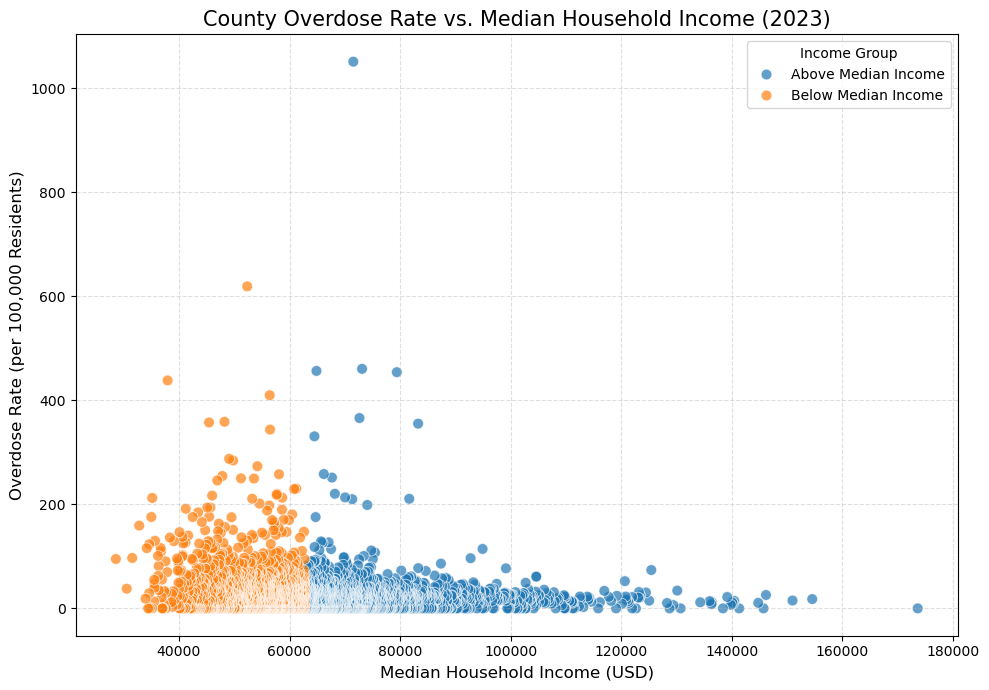

In [199]:
county_df['Income Group'] = county_df['median_household_income_2023'].apply(
    lambda x: 'Below Median Income' if x < median_income else 'Above Median Income'
)

plt.figure(figsize=(10,7))
sns.scatterplot(
    data=county_df,
    x='median_household_income_2023',
    y='od_rate_per_100k',
    hue='Income Group',
    palette={'Below Median Income': '#FF7F0E', 'Above Median Income': '#1F77B4'},
    alpha=0.7,
    edgecolor='white',
    s=60
)

# Titles and labels
plt.title('County Overdose Rate vs. Median Household Income (2023)', fontsize=15)
plt.xlabel('Median Household Income (USD)', fontsize=12)
plt.ylabel('Overdose Rate (per 100,000 Residents)', fontsize=12)
plt.legend(title='Income Group')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [200]:
county_df["log_od_rate_2023"] = np.log(county_df["od_rate_2023"] + (0.000120322464204067)/2)

Text(0.5, 1.0, 'Log OD Transformation Distribution (2023)')

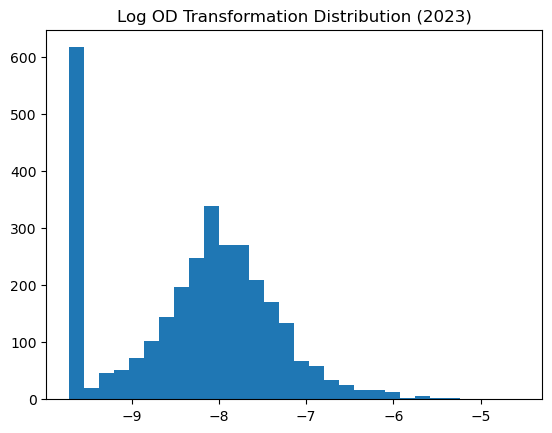

In [201]:
plt.hist(county_df['log_od_rate_2023'], bins=30)
plt.title('Log OD Transformation Distribution (2023)')


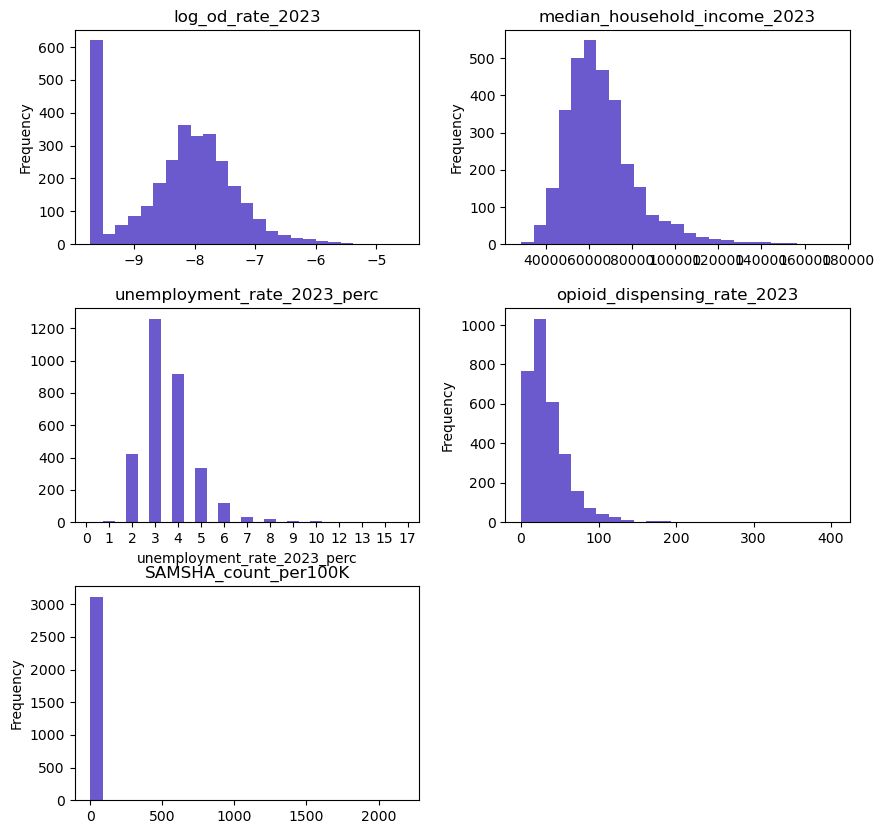

In [202]:
reg = rsm.model.regress(
    {"county_ods": county_df}, rvar="log_od_rate_2023", evar=["median_household_income_2023", "unemployment_rate_2023_perc", "opioid_dispensing_rate_2023", "SAMSHA_count_per100K"]
)
reg.plot("dist")

In [203]:
reg.summary(vif=True)

Linear regression (OLS)
Data                 : county_ods
Response variable    : log_od_rate_2023
Explanatory variables: median_household_income_2023, unemployment_rate_2023_perc, opioid_dispensing_rate_2023, SAMSHA_count_per100K
Null hyp.: the effect of x on log_od_rate_2023 is zero
Alt. hyp.: the effect of x on log_od_rate_2023 is not zero

                              coefficient  std.error  t.value p.value     
Intercept                          -8.549      0.100  -85.223  < .001  ***
median_household_income_2023       -0.000      0.000   -3.427  < .001  ***
unemployment_rate_2023_perc         0.126      0.014    9.246  < .001  ***
opioid_dispensing_rate_2023         0.002      0.001    3.580  < .001  ***
SAMSHA_count_per100K               -0.003      0.001   -2.679   0.007   **

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.05, Adjusted R-squared: 0.048
F-statistic: 40.141 df(4, 3076), p.value < 0.001
Nr obs: 3,081 (54 obs. dropped)

Variance inflat

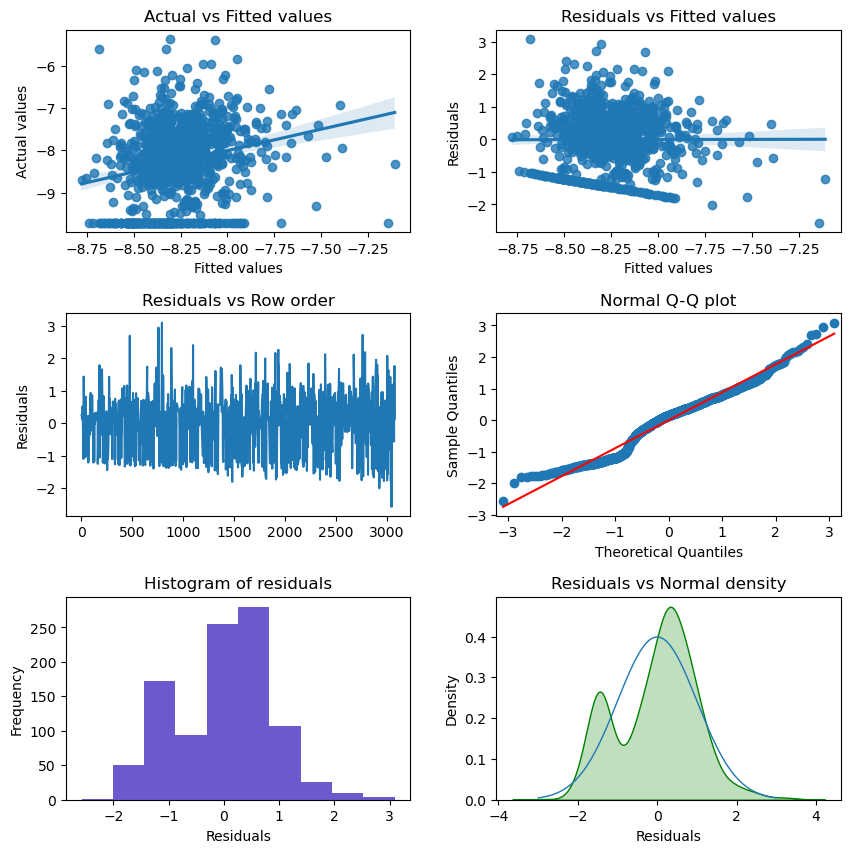

In [204]:
reg.plot('dashboard')

In [ ]:
county_df["log_pop"] = np.log(county_df["population_2023"])

# Utilize negative binomial regression to account for skew of OD data

nb_model = smf.glm(
    formula=("drug_od_count_2023 ~ "
                   "median_household_income_2023 + "
                   "unemployment_rate_2023_perc + "
                   "opioid_dispensing_rate_2023 + "
                   "SAMSHA_count_per100K"
                   ),
data=county_df,
family=sm.families.NegativeBinomial(alpha=1.0),
offset=county_df["log_pop"]
).fit()

print(nb_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:     drug_od_count_2023   No. Observations:                 3081
Model:                            GLM   Df Residuals:                     3076
Model Family:        NegativeBinomial   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10280.
Date:                Sun, 30 Nov 2025   Deviance:                       2870.9
Time:                        13:55:21   Pearson chi2:                 2.77e+03
No. Iterations:                     8   Pseudo R-squ. (CS):            0.05261
Covariance Type:            nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [ ]:
# Compute IRRs for statistically significant features to interpret model.
# IRR = e^coef

median_household_income_2023 = -1.272e-05
income_IRR = np.exp(median_household_income_2023)

print(income_IRR)

# Each $1 increase in median household income is associated with a 0.0013% decrease in overdose rates. To make it more interpretable, every $10,000 increase in median household income is associated with about a 12.5% lower overdose rate, holding other variables constant.

unemployment_rate_2023_perc = 0.0788
unemployment_IRR = np.exp(unemployment_rate_2023_perc)

print(unemployment_IRR)

# Each 1% increase in unemployment is associated with an 8.2% increase in overdose mortality.

SAMSHA_count_per100K  = 0.0056
SAMSHA_IRR = np.exp(SAMSHA_count_per100K)

print(SAMSHA_IRR)

# Each additional SAMHSA facility per 100k population corresponds to a. 0.6% increase in overdose mortality. This is not causal, but indicates facilities are allocated to areas with higher need.


0.9999872800808989
1.0819879028485442
1.0056157093103564
